# Step 1: Load and Prepare the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\\Users\\aliev\\OneDrive\\Desktop\\datasets\\covid_19_data.csv")

In [2]:
df.head(5)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Step 2: Data Exploration and Understanding

In [3]:
print(df.describe())

               SNo     Confirmed       Deaths     Recovered
count  6722.000000   6722.000000  6722.000000   6722.000000
mean   3361.500000    601.195924    19.855846    226.341267
std    1940.618587   4896.332140   204.486922   2556.035202
min       1.000000      0.000000     0.000000      0.000000
25%    1681.250000      2.000000     0.000000      0.000000
50%    3361.500000     13.000000     0.000000      0.000000
75%    5041.750000    108.000000     1.000000     11.000000
max    6722.000000  67800.000000  3122.000000  56927.000000


In [4]:
print(df.isnull().sum())

SNo                   0
ObservationDate       0
Province/State     2769
Country/Region        0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


# Step 3: Data Preprocessing

In [5]:
cols = []
for col in df.columns:
    cols.append(col.replace(" ", "_"))
df.columns=cols


df_pure = df.drop(columns=['SNo', 'Province/State', 'Country/Region', 'Last_Update'], axis=1)
df_pure.head(5)

,ObservationDate,Confirmed,Deaths,Recovered
0,01/22/2020,1.0,0.0,0.0
1,01/22/2020,14.0,0.0,0.0
2,01/22/2020,6.0,0.0,0.0
3,01/22/2020,1.0,0.0,0.0
4,01/22/2020,0.0,0.0,0.0


In [6]:
df_pure = df_pure.groupby(['ObservationDate']).sum().reset_index()
df_pure['ObservationDate'] = pd.to_datetime(df_pure['ObservationDate'])


# df['ObservationDate'].min()
# df['ObservationDate'].max()

# df_pure['ObservationDate'].min()
# df_pure['ObservationDate'].max()

df_pure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   ObservationDate  57 non-null     datetime64[ns]
 1   Confirmed        57 non-null     float64       
 2   Deaths           57 non-null     float64       
 3   Recovered        57 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 KB


# Step 4: Feature Engineering

In [7]:
df_pure_max_date = df_pure['ObservationDate'].max()
df_pure_min_date = df_pure['ObservationDate'].min()

print(df_pure_max_date, df_pure_min_date)

def subtraction(ObservationDate):
    return (ObservationDate - df_pure_min_date).days + 1

df_pure['DayCounter'] = df_pure['ObservationDate'].apply(lambda x: subtraction(x))
df_pure.drop('ObservationDate', axis=1, inplace=True)

df_pure.head(10)

2020-03-18 00:00:00 2020-01-22 00:00:00


,Confirmed,Deaths,Recovered,DayCounter
0,555.0,17.0,28.0,1
1,653.0,18.0,30.0,2
2,941.0,26.0,36.0,3
3,1438.0,42.0,39.0,4
4,2118.0,56.0,52.0,5
5,2927.0,82.0,61.0,6
6,5578.0,131.0,107.0,7
7,6165.0,133.0,126.0,8
8,8235.0,171.0,143.0,9
9,9925.0,213.0,222.0,10


In [16]:
# Calculate 'Infected' as a target variable
df_pure['Infected'] = df_pure['Confirmed'] - (df_pure['Recovered'] + df_pure['Deaths'])

df_pure.head(5)

,Confirmed,Deaths,Recovered,DayCounter,Infected
0,555.0,17.0,28.0,1,510.0
1,653.0,18.0,30.0,2,605.0
2,941.0,26.0,36.0,3,879.0
3,1438.0,42.0,39.0,4,1357.0
4,2118.0,56.0,52.0,5,2010.0


In [9]:
# Select features and target variables

X = df_pure[['DayCounter']] # feature
# y = df_pure[['Confirmed', 'Deaths', 'Recovered', 'Infected']] # target

y = df_pure[['Confirmed']]

# Step 5: Train-Test Split

In [10]:

# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train the Linear Regression Model

In [11]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

# Step 7: Make Predictions

In [12]:
y_pred = model.predict(X_test)
y_pred

array([[-14763.83311664],
       [   419.07836036],
       [ 76333.63574539],
       [ 24711.73672357],
       [ 88479.96492699],
       [152248.19313041],
       [ 67223.88885918],
       [ 79370.21804079],
       [121882.3701764 ],
       [ 21675.15442817],
       [127955.53476721],
       [ -5654.08623044]])

In [13]:
y_test

,Confirmed
0,555.0
5,2927.0
30,76843.0
13,23892.0
34,80415.0
55,197168.0
27,75138.0
31,78599.0
45,105836.0
12,19881.0


# Step 8: Evaluate the Model

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate and print The coefficient of determination (R²)
r2 = r2_score(y_test, y_pred)
print(f"R²: {r2:.2f}")

Mean Squared Error: 242129129.57420608
R²: 0.92


# Step 9: Visualization

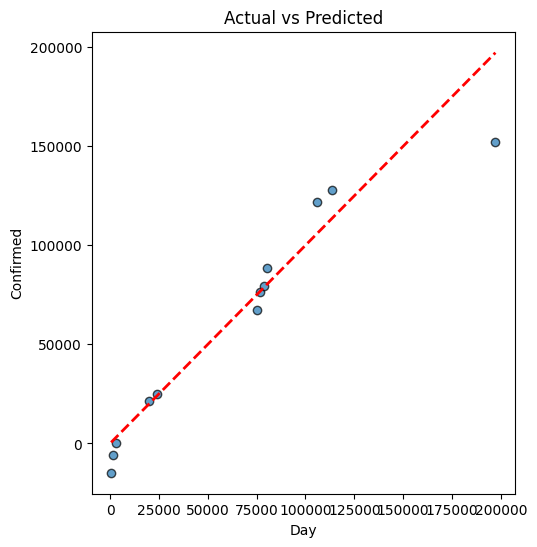

In [15]:
# Visualize the results
plt.figure(figsize=(12, 6))

# Plotting actual vs predicted prices
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Day')
plt.ylabel('Confirmed')
plt.title('Actual vs Predicted')
plt.show()